# EDA

The purpose of this notebook is to:

1. Explore and analyze the project dataset
2. Create explanatory visuals to describe the dataset
3. Explore features with missing values

## Import necessary libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Shape and features

In [51]:
df = pd.read_csv('../data/compiled.csv')
df

,Name,Grade,Section,Class,School,Race,Date,Place,Time (sec),Speed Rating,...,Wind Speed,Precipitation,Dew Point,Humidity,Wind Chill,Wind Gust,Heat Index,Visibility,Year,Distance (mi)
0,Allyson Tierney,12.0,01-,C,Albertus Magnus,Section 1-Class C,2014-11-01 00:00:00,25.0,1325,70.00,...,14.3,0.0,33.4,63.18,38.7,23.0,NaN,9.9,2014,3.106
1,Andrea Nardone,11.0,01-,C,Albertus Magnus,Section 1-Class C,2014-11-01 00:00:00,3.0,1172,121.03,...,14.3,0.0,33.4,63.18,38.7,23.0,NaN,9.9,2014,3.106
2,Emily Auld,11.0,01-,C,Albertus Magnus,Section 1-Class C,2014-11-01 00:00:00,15.0,1253,94.19,...,14.3,0.0,33.4,63.18,38.7,23.0,NaN,9.9,2014,3.106
3,Ruth Segall,10.0,01-,C,Ardsley,Section 1-Class C,2014-11-01 00:00:00,37.0,1384,50.54,...,14.3,0.0,33.4,63.18,38.7,23.0,NaN,9.9,2014,3.106
4,Selena Colon,12.0,01-,C,Ardsley,Section 1-Class C,2014-11-01 00:00:00,8.0,1198,112.62,...,14.3,0.0,33.4,63.18,38.7,23.0,NaN,9.9,2014,3.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330103,Broden Haltiner,10.0,05-,B,Newark,The Legends Inv,2019-10-12 00:00:00,2.0,1085,154.30,...,9.0,0.0,52.0,81.45,NaN,22.4,NaN,9.9,2019,3.106
330104,Tyree Orbaker,10.0,05-,B,Newark,The Legends Inv,2019-10-12 00:00:00,6.0,1179,122.73,...,9.0,0.0,52.0,81.45,NaN,22.4,NaN,9.9,2019,3.106
330105,Ayden Mowry,11.0,05-,C,Penn Yan,The Legends Inv,2019-10-12 00:00:00,9.0,1183,121.47,...,9.0,0.0,52.0,81.45,NaN,22.4,NaN,9.9,2019,3.106
330106,David Young,8.0,05-,C,Penn Yan,The Legends Inv,2019-10-12 00:00:00,10.0,1184,121.27,...,9.0,0.0,52.0,81.45,NaN,22.4,NaN,9.9,2019,3.106


In [52]:
df.columns

Index(['Name', 'Grade', 'Section', 'Class', 'School', 'Race', 'Date', 'Place',
       'Time (sec)', 'Speed Rating', 'SR', 'Gender', 'Race Section',
       'Latitude', 'Longitude', 'Temperature', 'Cloud Coverage', 'Wind Speed',
       'Precipitation', 'Dew Point', 'Humidity', 'Wind Chill', 'Wind Gust',
       'Heat Index', 'Visibility', 'Year', 'Distance (mi)'],
      dtype='object')

## Visuals

### Speed Rating vs Time

Scatter plot showing the linear relationship between race time and speed rating, with coloring to differentiate races shorter than 2.5 miles (blue) from those longer (yellow).

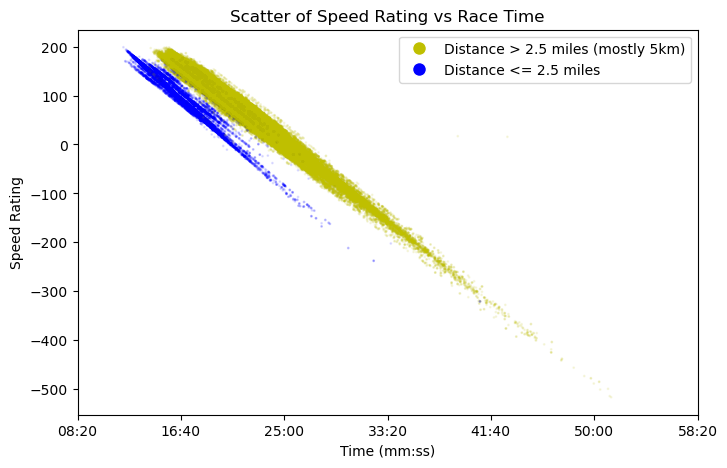

In [53]:
col = np.where(df['Distance (mi)'] < 2.6, 'b', 'y')
col2 = np.where((df['Time (sec)'] < 1000) & (df['Time (sec)'] > 990) & (df['Speed Rating'] < 105) & (df['Speed Rating'] > 95), 'r', 'b')

plt.figure(figsize=(8,5))

plt.scatter(df['Time (sec)'], df['Speed Rating'], c=col, s=1, alpha=.1)
plt.xlabel('Time (mm:ss)')
plt.ylabel('Speed Rating')
plt.title('Scatter of Speed Rating vs Race Time')
plt.xlim([500, 3200])

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Distance > 2.5 miles (mostly 5km)', markersize=10, markerfacecolor='y'),
                 plt.Line2D([0], [0], marker='o', color='w', label='Distance <= 2.5 miles', markersize=10, markerfacecolor='b')]

plt.legend(handles=legend_labels)

plt.xticks(ticks=plt.xticks()[0], labels=[f"{int(tick)//60:02d}:{int(tick)%60:02d}" for tick in plt.xticks()[0]])

plt.savefig('../figures/speed-rating-time.png', dpi=300, bbox_inches='tight')

plt.show()

### Distribution of Speed Ratings by Gender

Histogram showing the distribution of speed ratings among female (blue) and male (green) runners, revealing a different average speed rating among genders, and therefore, a bimodal distribution of speed ratings.

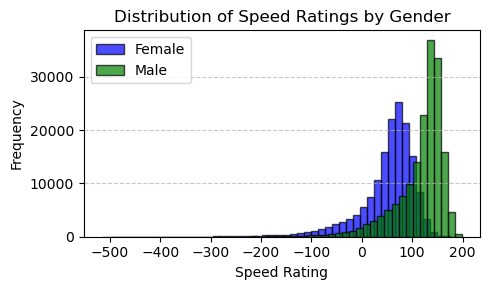

In [54]:
plt.figure(figsize=(5, 3))

# Plotting the histogram for Female speed ratings
plt.hist(df[df['Gender'] == 'Female']['Speed Rating'], bins=50, edgecolor='black', color='blue', alpha=0.7, label='Female')

# Plotting the histogram for Male speed ratings
plt.hist(df[df['Gender'] == 'Male']['Speed Rating'], bins=50, edgecolor='black', color='green', alpha=0.7, label='Male')

plt.title('Distribution of Speed Ratings by Gender')
plt.xlabel('Speed Rating')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../figures/dist-speed-rating-gender.png', dpi=600)
plt.show()

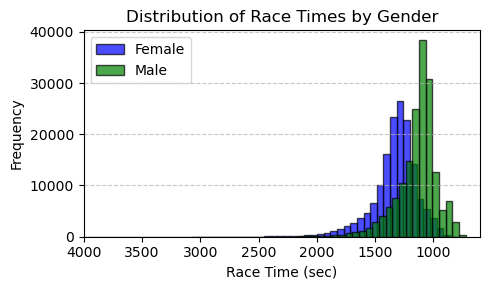

In [55]:
plt.figure(figsize=(5, 3))

# Plotting the histogram for Female speed ratings
plt.hist(df[df['Gender'] == 'Female']['Time (sec)'], bins=40, edgecolor='black', color='blue', alpha=0.7, label='Female')

# Plotting the histogram for Male speed ratings
plt.hist(df[df['Gender'] == 'Male']['Time (sec)'], bins=90, edgecolor='black', color='green', alpha=0.7, label='Male')

plt.xlim(600, 4000)
plt.gca().invert_xaxis()

plt.title('Distribution of Race Times by Gender')
plt.xlabel('Race Time (sec)')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../figures/dist-time-gender.png', dpi=600)
plt.show()

### Place vs Time relevance to Speed Ratings

Scatter plot comparing the finishing time and place for runners of the McQuaid invitational, color labeling per year, where runners in 2019 got a speed rating 3 points higher due to a “slow” race.

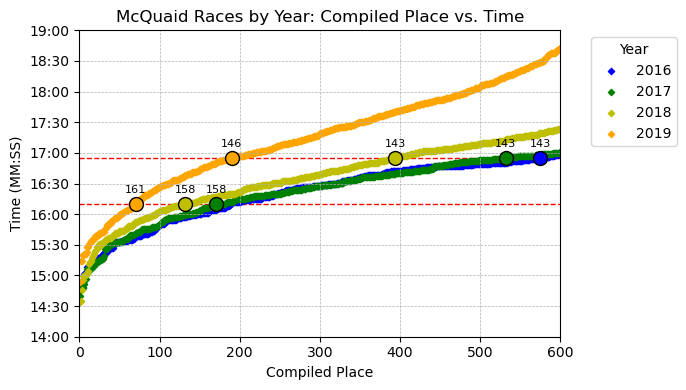

In [56]:
course = "McQuaid"
course_data = df[df['Race'].str.contains(course, case=False, na=False)].copy()

course_data['Year'] = pd.to_datetime(course_data['Date']).dt.year
unique_years_course = sorted(course_data['Year'].unique())

def seconds_to_mmss(seconds):
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes:02d}:{seconds:02d}"


plt.figure(figsize=(7, 4))
year_to_color = [(2015, "teal"), (2016, "b"), (2017, "g"), (2018, "y"), (2019, "orange")]

for year, color in year_to_color:
    if year in unique_years_course:
        if year < 2016:
            continue
        subset = course_data[course_data['Year'] == year]
        subset = subset.sort_values(by='Time (sec)')
        subset['Updated Place'] = range(1, len(subset) + 1)
        plt.scatter(subset['Updated Place'], subset['Time (sec)'], color=color, label=year, alpha=1, s=10, marker="D")
        top_5 = subset[subset["Time (sec)"] == 1015]
        i = 0
        for _, row in top_5.iterrows():
            if i != 0:
                continue
            i += 1
            plt.annotate(str(int(row['Speed Rating'])), (row['Updated Place'], row['Time (sec)']), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8, color="black")
            plt.scatter(row['Updated Place'], row['Time (sec)'], color=color, s=100, edgecolors='black', linewidths=1, zorder=3)
        top_5 = subset[subset["Time (sec)"] == 970]
        i = 0
        for _, row in top_5.iterrows():
            if i != 0:
                continue
            i += 1
            plt.annotate(str(int(row['Speed Rating'])), (row['Updated Place'], row['Time (sec)']), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8, color="black")
            plt.scatter(row['Updated Place'], row['Time (sec)'], color=color, s=100, edgecolors='black', linewidths=1, zorder=3)

plt.axhline(y=970, color='red', linestyle='--', linewidth=1, zorder=0)
# plt.axhline(y=1000, color='red', linestyle='--', linewidth=1, zorder=0)
plt.axhline(y=1015, color='red', linestyle='--', linewidth=1, zorder=0)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(30))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: seconds_to_mmss(val)))

plt.xlim(0,600)
plt.ylim(840,1140)

plt.title(f'{course} Races by Year: Compiled Place vs. Time')
plt.xlabel('Compiled Place')
plt.ylabel('Time (MM:SS)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('../figures/place-vs-time.png', dpi=600)
plt.show()

### Spread of Speed Ratings

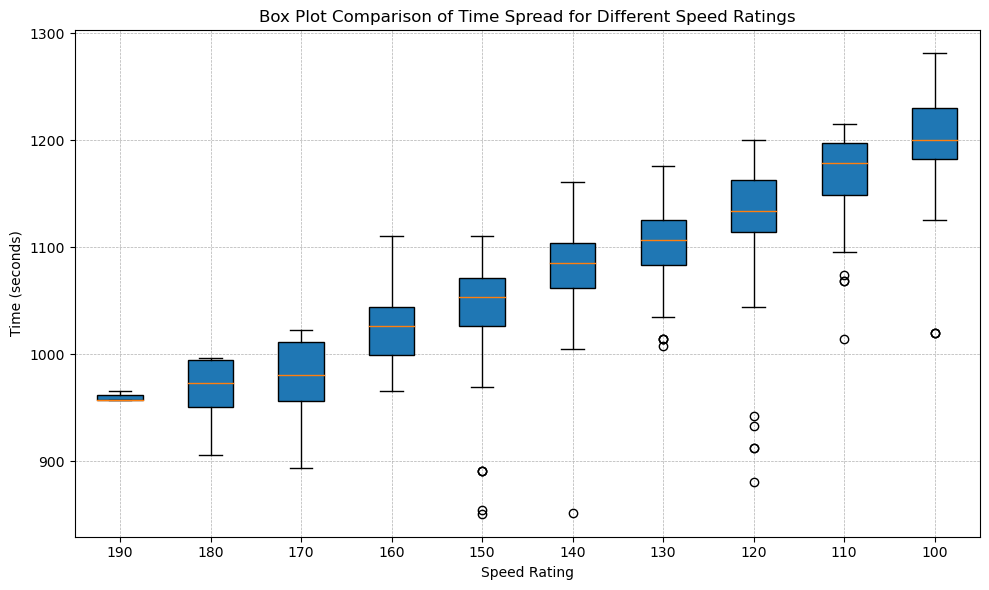

In [57]:
data_190 = df[df['Speed Rating'] == 190]['Time (sec)']
data_180 = df[df['Speed Rating'] == 180]['Time (sec)']
data_170 = df[df['Speed Rating'] == 170]['Time (sec)']
data_160 = df[df['Speed Rating'] == 160]['Time (sec)']
data_150 = df[df['Speed Rating'] == 150]['Time (sec)']
data_140 = df[df['Speed Rating'] == 140]['Time (sec)']
data_130 = df[df['Speed Rating'] == 130]['Time (sec)']
data_120 = df[df['Speed Rating'] == 120]['Time (sec)']
data_110 = df[df['Speed Rating'] == 110]['Time (sec)']
data_100 = df[df['Speed Rating'] == 100]['Time (sec)']

# Data for boxplot
box_data = [data_190, data_180, data_170, data_160, data_150, data_140, data_130, data_120, data_110, data_100]
labels = ['190', '180', '170', '160', '150', '140', '130', '120', '110', '100']

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(box_data, labels=labels, vert=True, patch_artist=True)

plt.title('Box Plot Comparison of Time Spread for Different Speed Ratings')
plt.xlabel('Speed Rating')
plt.ylabel('Time (seconds)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Missing Values

In [58]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (330108, 27)
fraction of missing values in features:
Class         0.077135
Wind Chill    0.788175
Wind Gust     0.623408
Heat Index    0.965669
dtype: float64
data types of the features with missing values:
Class          object
Wind Chill    float64
Wind Gust     float64
Heat Index    float64
dtype: object
fraction of points with missing values: 1.0


### Explanation for missing `class` values

In [59]:
missing_class_val_sections = df[df['Class'].isna()]['Section'].unique()
print("The sections for people with missing class values are from", missing_class_val_sections)

missing_class_df = df[df['Class'].isna()]
unique_sections_with_missing_class = missing_class_df['Section'].unique()
filtered_df = df[df['Section'].isin(unique_sections_with_missing_class)]
unique_classes_for_missing_class_sections = filtered_df['Class'].unique()
print(missing_class_val_sections, "have section values", unique_classes_for_missing_class_sections)
print("Therefore, we can conclude (also by researching online), that", missing_class_val_sections, "aren't assigned class values by default")
print("Schools are assigned a class value by population size.")

The sections for people with missing class values are from ['PSA' 'CHS' 'AIS']
['PSA' 'CHS' 'AIS'] have section values [nan]
Therefore, we can conclude (also by researching online), that ['PSA' 'CHS' 'AIS'] aren't assigned class values by default
Schools are assigned a class value by population size.


### Explanation for missing `heat index` values

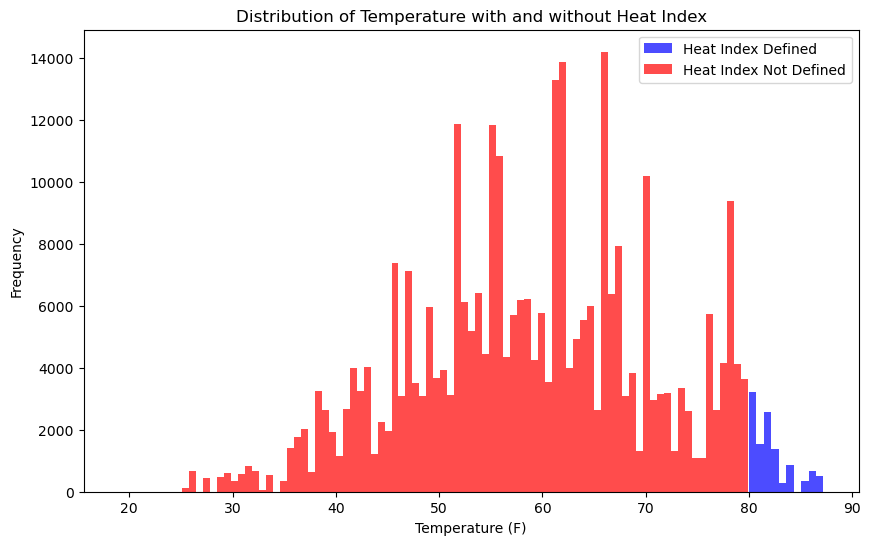

Heat index is undefined for temperatures under 80F


In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_with_heat_index = df[~df['Heat Index'].isna()]
df_without_heat_index = df[df['Heat Index'].isna()]

temp_with_heat_index = df_with_heat_index['Temperature']
temp_without_heat_index = df_without_heat_index['Temperature']

plt.figure(figsize=(10, 6))
plt.hist(temp_with_heat_index, bins=10, color='blue', alpha=0.7, label='Heat Index Defined')
plt.hist(temp_without_heat_index, bins=90, color='red', alpha=0.7, label='Heat Index Not Defined')

plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature with and without Heat Index')
plt.legend()

plt.savefig('../figures/dist-temp-heat-index.png', dpi=600)

plt.show()

print("Heat index is undefined for temperatures under 80F")

### Explanation for missing `wind chill` values

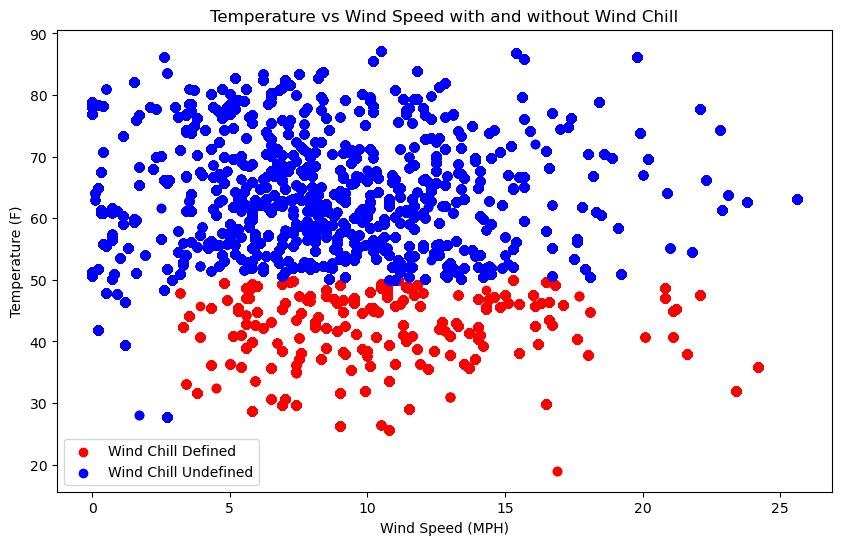

Wind chill is defined when the temperature is below 50F and wind speeds are above 3MPH


In [61]:
import matplotlib.pyplot as plt
import pandas as pd

df_with_wind_chill = df[~df['Wind Chill'].isna()]
df_without_wind_chill = df[df['Wind Chill'].isna()]

temp_with_wind_chill = df_with_wind_chill['Temperature']
wind_speed_with_wind_chill = df_with_wind_chill['Wind Speed']

temp_without_wind_chill = df_without_wind_chill['Temperature']
wind_speed_without_wind_chill = df_without_wind_chill['Wind Speed']

plt.figure(figsize=(10, 6))
plt.scatter(wind_speed_with_wind_chill, temp_with_wind_chill, color='red', label='Wind Chill Defined')
plt.scatter(wind_speed_without_wind_chill, temp_without_wind_chill, color='blue', label='Wind Chill Undefined')

plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Wind Speed with and without Wind Chill')
plt.legend()

plt.savefig('../figures/temp-vs-wind-speed-wind-chill.png', dpi=600)

plt.show()

print("Wind chill is defined when the temperature is below 50F and wind speeds are above 3MPH") 

### Explanation for missing `wind gust` values

No clear reason why `wind gust` is undefined, so XGBoost will be used to fill the missing values.

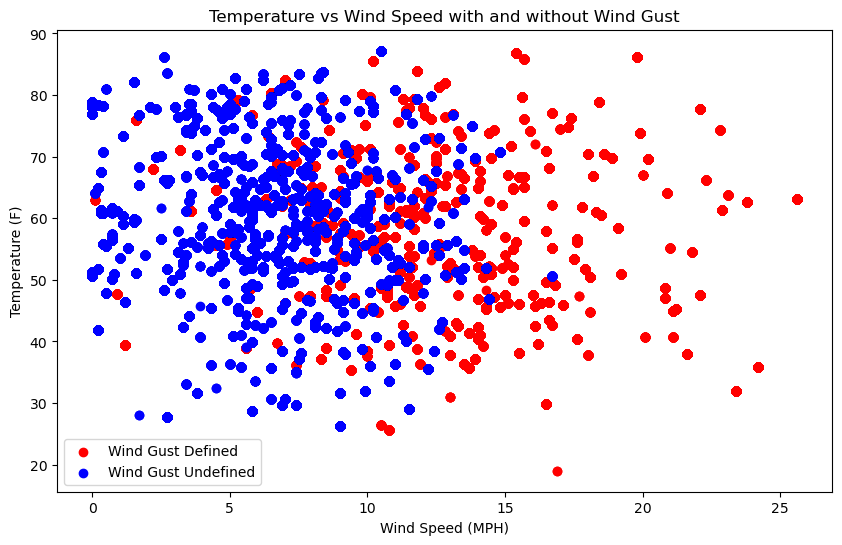

No clear reason why wind gust is undefined


In [62]:
import matplotlib.pyplot as plt
import pandas as pd

df_with_wind_gust = df[~df['Wind Gust'].isna()]
df_without_wind_gust = df[df['Wind Gust'].isna()]

temp_with_wind_gust = df_with_wind_gust['Temperature']
wind_speed_with_wind_gust = df_with_wind_gust['Wind Speed']

temp_without_wind_gust = df_without_wind_gust['Temperature']
wind_speed_without_wind_gust = df_without_wind_gust['Wind Speed']

plt.figure(figsize=(10, 6))
plt.scatter(wind_speed_with_wind_gust, temp_with_wind_gust, color='red', label='Wind Gust Defined')
plt.scatter(wind_speed_without_wind_gust, temp_without_wind_gust, color='blue', label='Wind Gust Undefined')

plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Wind Speed with and without Wind Gust')
plt.legend()

plt.savefig('../figures/temp-vs-wind-speed-wind-gust.png', dpi=600)

plt.show()

print("No clear reason why wind gust is undefined") 